## Using tensorflow

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import các thư viện cần thiết

In [ ]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
%matplotlib inline

# Defining the parameters
batch_size = 32
num_classes = 10
epochs = 50

### Data

In [ ]:
import torch
import numpy as np
from PIL import Image
import cv2

image_path = '/content/drive/MyDrive/5_AIADVANCE/ai.png'

# Mở hình ảnh bằng PIL
img = Image.open(image_path)

# Chuyển hình ảnh sang mảng Numpy
img_array = np.array(img)

# Resize mảng Numpy
img_array = cv2.resize(img_array, (28,28))

# # Chuyển mảng Numpy sang Tensor
# img_tensor = torch.from_numpy(img_array)
# print(img_tensor.shape)

# # Chuyển sang 3 kênh màu
# if img_tensor.ndimension() == 2:
#   img_tensor = img_tensor.unsqueeze(0)

# img_tensor = img_tensor.repeat(1,3,1,1)

# # Normalize giá trị pixel
# img_tensor = img_tensor / 255.0

# # Lưu hình ảnh đã chuẩn hóa
# torch.save(img_tensor, './image_preprocessed.pt')

In [ ]:
# đọc ảnh ra có shape 28*28

### Model

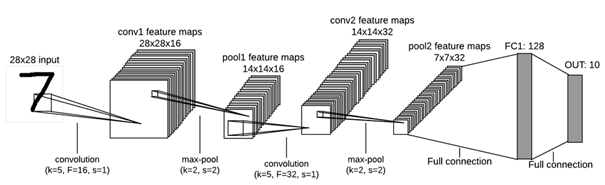

In [ ]:
import tensorflow as tf

class CNN(tf.keras.Model):

  def __init__(self, in_channels, num_classes, input_shape=(128,128,3)):
    super(CNN, self).__init__()
    # Khởi tạo giá trị cho custom_kernel1
    initial_value = tf.reshape([[[0.0, 0.0, 0.0],
                                [0.0, 1.0, 0.0],
                                [0.0, 0.0, 0.0]],
                                [[0.0, 0.0, 0.0],
                                [0.0, 1.0, 0.0],
                                [0.0, 0.0, 0.0]],
                                [[0.0, 0.0, 0.0],
                                [0.0, 1.0, 0.0],
                                [0.0, 0.0, 0.0]]],
                              shape=(3,3,3))
    initial_value1 = tf.reshape([[[0.0, 0.0, 0.0],
                                [0.0, 1.0, 0.0],
                                [0.0, 0.0, 0.0]]],
                              shape=(3,3,1))
    print(initial_value1.shape)
    initial_value2 = tf.repeat(initial_value1, 16, axis=-1)
    print(initial_value2.shape)
    repeated_value = tf.repeat(initial_value, 16, axis=-1)
    repeated_value2 = tf.repeat(initial_value2, 32, axis=-1)
    print(repeated_value2.shape)
    # Khởi tạo custom_kernel1 với kích thước mới
    self.custom_kernel1 = tf.Variable(
      initial_value=tf.reshape(repeated_value, shape=(3,3,3,16)))

    self.custom_kernel2 = tf.Variable(
      initial_value=tf.reshape(repeated_value2, shape=(3,3,16,32)))
    print(self.custom_kernel2.shape)

    self.conv1 = tf.keras.layers.Conv2D(
      16, 3, padding='same')
    self.conv1.build(input_shape=(None,28,28,3))
    weight = [self.custom_kernel1.numpy()]
    bias = tf.zeros([16])
    self.conv1.set_weights(weight + [bias])

    self.max_pool1 = tf.keras.layers.MaxPool2D(2, 2)

    self.conv2 = tf.keras.layers.Conv2D(
      32, 3, padding='same')
    self.conv2.build(input_shape=(None, 14, 14, 16))
    weight = [self.custom_kernel2.numpy()]
    bias = tf.zeros([32])
    self.conv2.set_weights(weight + [bias])

    self.max_pool2 = tf.keras.layers.MaxPool2D(2, 2)

    self.flatten = tf.keras.layers.Flatten()

    self.fc1 = tf.keras.layers.Dense(128, activation='relu')

    self.fc2 = tf.keras.layers.Dense(num_classes)

  def call(self, inputs):
    x = self.conv1(inputs)
    print(x.shape)
    x = self.max_pool1(x)
    print(x.shape)
    x = self.conv2(x)
    print(x.shape)
    x = self.max_pool2(x)
    print(x.shape)
    x = self.flatten(x)
    print(x.shape)
    x = self.fc1(x)
    print(x.shape)
    x = self.fc2(x)
    print(x.shape)
    return x

In [ ]:
in_channels = 3
num_classes = 10

In [ ]:
model = CNN(in_channels=in_channels, num_classes=num_classes)

(3, 3, 1)
(3, 3, 16)
(3, 3, 512)
(3, 3, 16, 32)


In [ ]:
# Build model
model.build(input_shape=(None, 28, 28, 3))

model.summary(line_length=0)

(None, 28, 28, 16)
(None, 14, 14, 16)
(None, 14, 14, 32)
(None, 7, 7, 32)
(None, 1568)
(None, 128)
(None, 10)
Model: "cnn_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           multiple                  448       
                                                                 
 max_pooling2d_2 (MaxPoolin  multiple                  0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           multiple                  4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  multiple                  0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                 

In [ ]:
inputs = tf.expand_dims(img_array, axis=0)
# Chuyển kiểu dữ liệu sang float32
inputs = tf.cast(inputs, dtype=tf.float32)

output = model(inputs, training=False)

(1, 28, 28, 16)
(1, 14, 14, 16)
(1, 14, 14, 32)
(1, 7, 7, 32)
(1, 1568)
(1, 128)
(1, 10)


In [ ]:
conv1_output = model.conv1(inputs)
conv2_output = model.conv2(conv1_output)

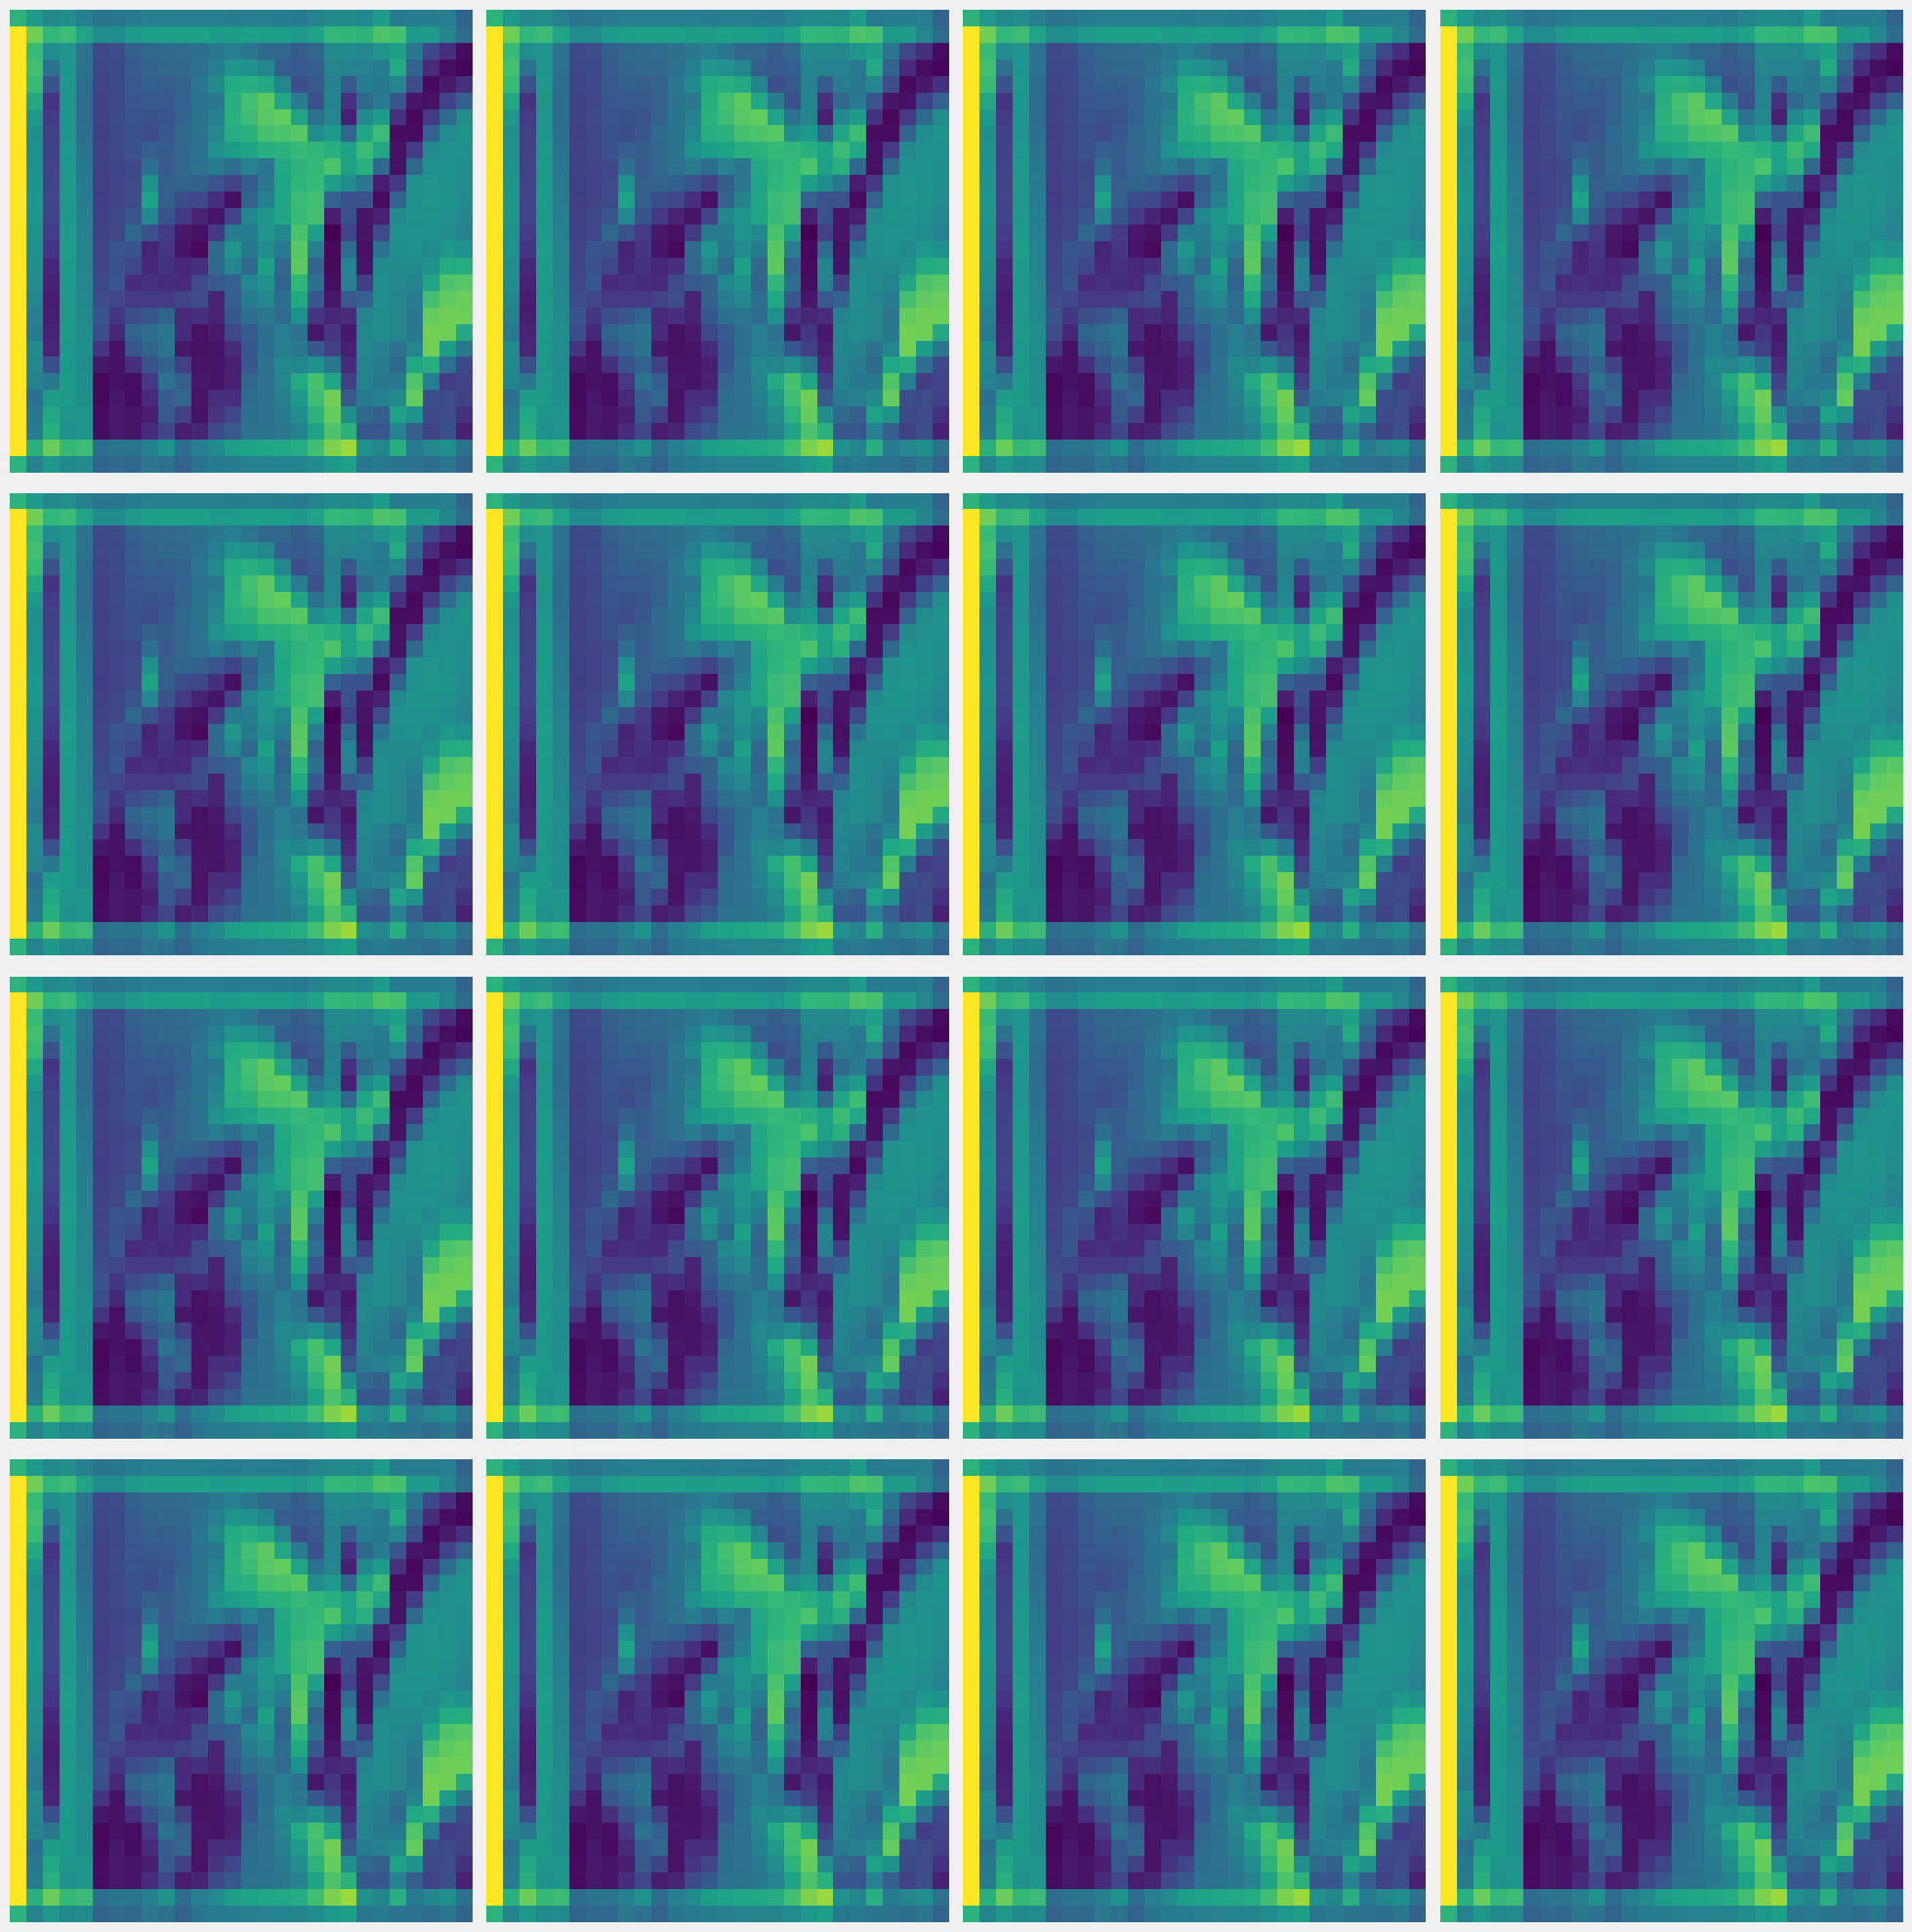

In [ ]:
features = conv1_output
num_features = features.shape[-1]

# Số cột
num_cols = 4

# Số dòng
num_rows = int(np.ceil(num_features/num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,20))

for i in range(num_features):
  row = int(i/num_cols)
  col = i%num_cols

  axs[row,col].imshow(features[0,:,:,i])
  axs[row,col].axis('off')

plt.tight_layout()
plt.show()

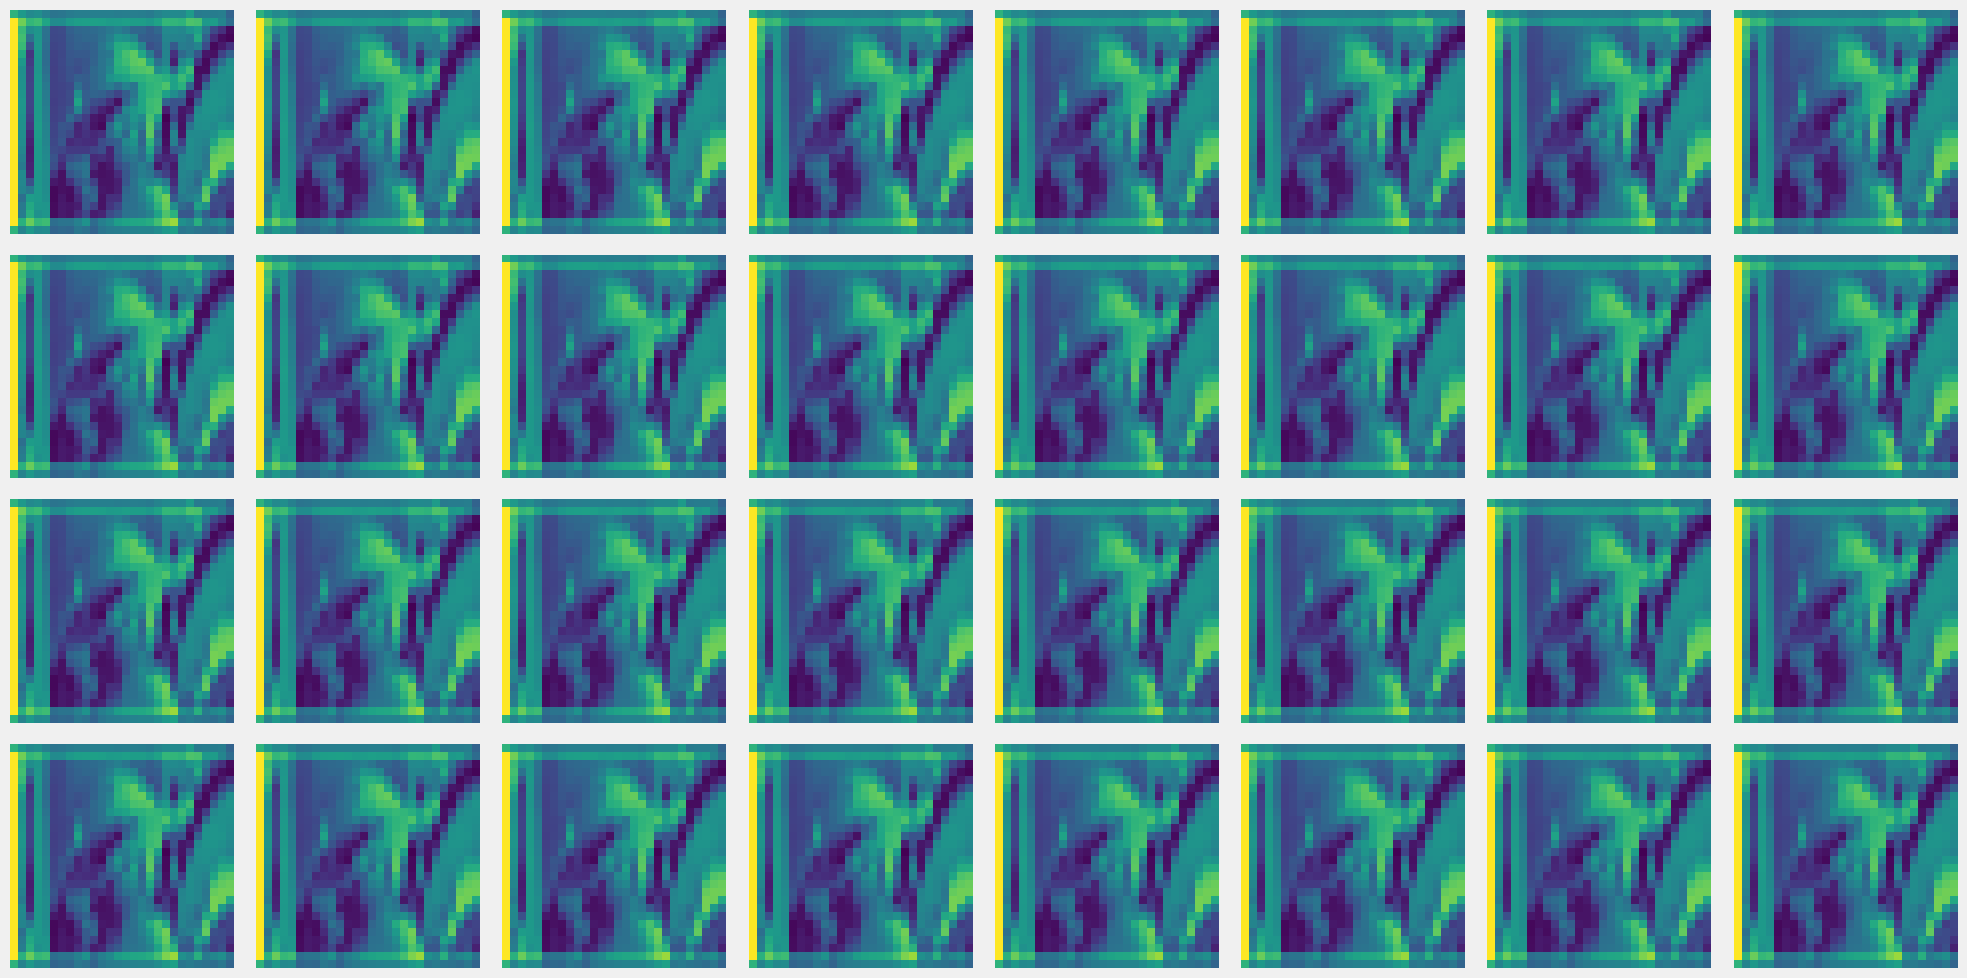

In [ ]:
features = conv2_output
num_features = features.shape[-1]

# Số cột
num_cols = 8

# Số dòng
num_rows = int(np.ceil(num_features/num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,10))

for i in range(num_features):
  row = int(i/num_cols)
  col = i%num_cols

  axs[row,col].imshow(features[0,:,:,i])
  axs[row,col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
inputs = tf.expand_dims(img_array, axis=0)

# Chuyển kiểu dữ liệu sang float32
inputs = tf.cast(inputs, dtype=tf.float32)

# Hoặc normalize dữ liệu trong khoảng 0-1
inputs = inputs / 255.0
output = model(inputs)

(1, 28, 28, 16)
(1, 14, 14, 16)
(1, 14, 14, 32)
(1, 7, 7, 32)
(1, 1568)
(1, 128)
(1, 10)


In [ ]:
print(output)

tf.Tensor(
[[ 36.35537  -28.345287  12.619292  43.391228  18.205975  14.722577
   12.860936 -28.905287  60.498047 -23.818333]], shape=(1, 10), dtype=float32)


### Huấn luyện

In [ ]:
import tensorflow as tf

def log_loss(y_true, y_pred):
  return -tf.reduce_mean(y_true * tf.math.log(y_pred) +
                         (1 - y_true) * tf.math.log(1 - y_pred))

In [ ]:
@tf.function
def train_step(images, labels, optimizer):
  print("this")
  with tf.GradientTape() as tape:
    prediction = model(images, training=True)
    loss = log_loss(labels, prediction)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

optimizer = tf.optimizers.SGD(learning_rate=0.01)

In [ ]:
import tensorflow as tf

image_paths = [
  '/content/drive/MyDrive/5_AIADVANCE/ai.png',
]

labels = [
  9
]

# Tạo Dataset từ đường dẫn hình ảnh

image_dataset = tf.data.Dataset.from_tensor_slices((image_paths))

# Parse hình ảnh từ đường dẫn
image_dataset = image_dataset.map(
  lambda x: tf.io.read_file(x))

# Nén hình ảnh
image_dataset = image_dataset.map(
  lambda x: tf.image.decode_jpeg(x, channels=3))

# Resize hình ảnh
image_dataset = image_dataset.map(
  lambda x: tf.image.resize(x, [28, 28]))

# Chuẩn hóa hình ảnh
image_dataset = image_dataset.map(
  lambda x: (tf.cast(x, tf.float32)/255))

# Thêm nhãn
label_dataset = tf.data.Dataset.from_tensor_slices(labels)

# Kết hợp tập ảnh và nhãn
train_dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

# Trộn dữ liệu
train_dataset = train_dataset.shuffle(10)

# Batch dữ liệu
train_dataset = train_dataset.batch(batch_size)

In [ ]:
for epoch in range(epochs):
  for images, labels in train_dataset:
    labels = tf.cast(labels, tf.float32)
    train_step(images, labels, optimizer)

this
(1, 28, 28, 16)
(1, 14, 14, 16)
(1, 14, 14, 32)
(1, 7, 7, 32)
(1, 1568)
(1, 128)
(1, 10)


this
(1, 28, 28, 16)
(1, 14, 14, 16)
(1, 14, 14, 32)
(1, 7, 7, 32)
(1, 1568)
(1, 128)
(1, 10)


## Using pytorch

### Model

In [2]:
!pip install torchsummary

In [3]:
from torchsummary import summary

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.feature_maps = []

    def forward(self, x):
        x = F.relu(self.conv1(x))
        self.feature_maps.append(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        self.feature_maps.append(x)
        x = self.pool(x)
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def custom_init_weights(model):
    # Custom weights for conv1
    with torch.no_grad():
        custom_kernel = torch.tensor([[[[1, 0, -1], [1, 0, -1], [1, 0, -1]]]], dtype=torch.float32)
        repeated_kernel = custom_kernel.repeat(model.conv1.out_channels, 1, 1, 1)
        model.conv1.weight.copy_(repeated_kernel)

        # Đảm bảo rằng các trọng số còn lại được khởi tạo ngẫu nhiên hoặc theo cách bạn muốn
        nn.init.kaiming_normal_(model.conv2.weight)
        nn.init.constant_(model.conv2.bias, 0.0)

# Khởi tạo mô hình
model = SimpleCNN()

# Tùy chỉnh kernel đầu vào
custom_init_weights(model)

# Kiểm tra kernel đầu vào
print(model.conv1.weight[1])

tensor([[[ 1.,  0., -1.],
         [ 1.,  0., -1.],
         [ 1.,  0., -1.]]], grad_fn=<SelectBackward0>)


In [4]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
         MaxPool2d-2           [-1, 16, 14, 14]               0
            Conv2d-3           [-1, 32, 14, 14]           4,640
         MaxPool2d-4             [-1, 32, 7, 7]               0
            Linear-5                  [-1, 128]         200,832
            Linear-6                   [-1, 10]           1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.18
Params size (MB): 0.79
Estimated Total Size (MB): 0.97
----------------------------------------------------------------


### Map feature map

In [7]:
def plot_feature_maps(feature_maps, num_columns=8):
    for idx, fmap in enumerate(feature_maps):
        fmap = fmap.detach().cpu().numpy()
        num_filters = fmap.shape[1]

        # Tính toán số hàng cần thiết
        num_rows = (num_filters + num_columns - 1) // num_columns

        fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 2, num_rows * 2))
        fig.suptitle(f'Layer {idx+1} Feature Maps')

        for i in range(num_filters):
            row = i // num_columns
            col = i % num_columns
            ax = axes[row, col]
            ax.imshow(fmap[0, i]) #, cmap='gray'
            ax.axis('off')

        # Ẩn các ô trống nếu có
        for i in range(num_filters, num_rows * num_columns):
            row = i // num_columns
            col = i % num_columns
            ax = axes[row, col]
            ax.axis('off')

        plt.show()


In [13]:
from torchvision import datasets, transforms
from PIL import Image

def load_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Chuyển đổi thành ảnh xám nếu cần
        transforms.Resize((28, 28)),  # Resize ảnh về kích thước 28x28
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    image = Image.open(image_path)
    image = transform(image)
    return image


In [23]:
print(model.fc1.weight.shape)

torch.Size([128, 1568])


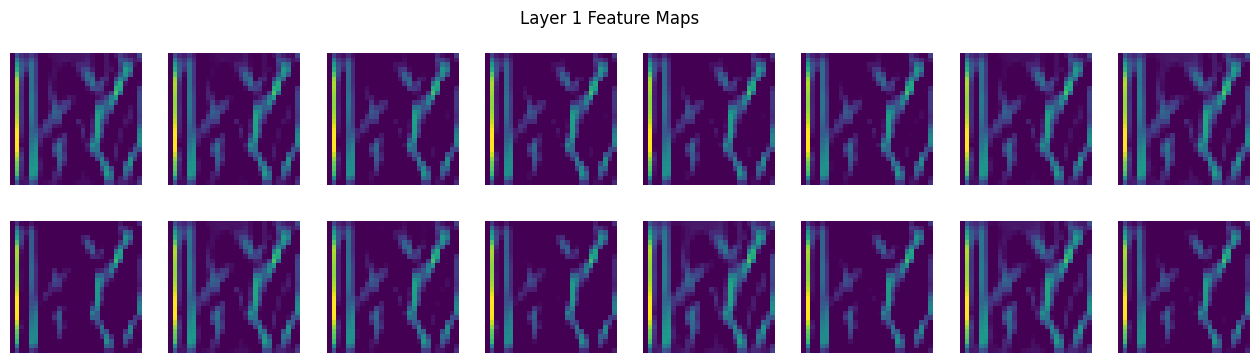

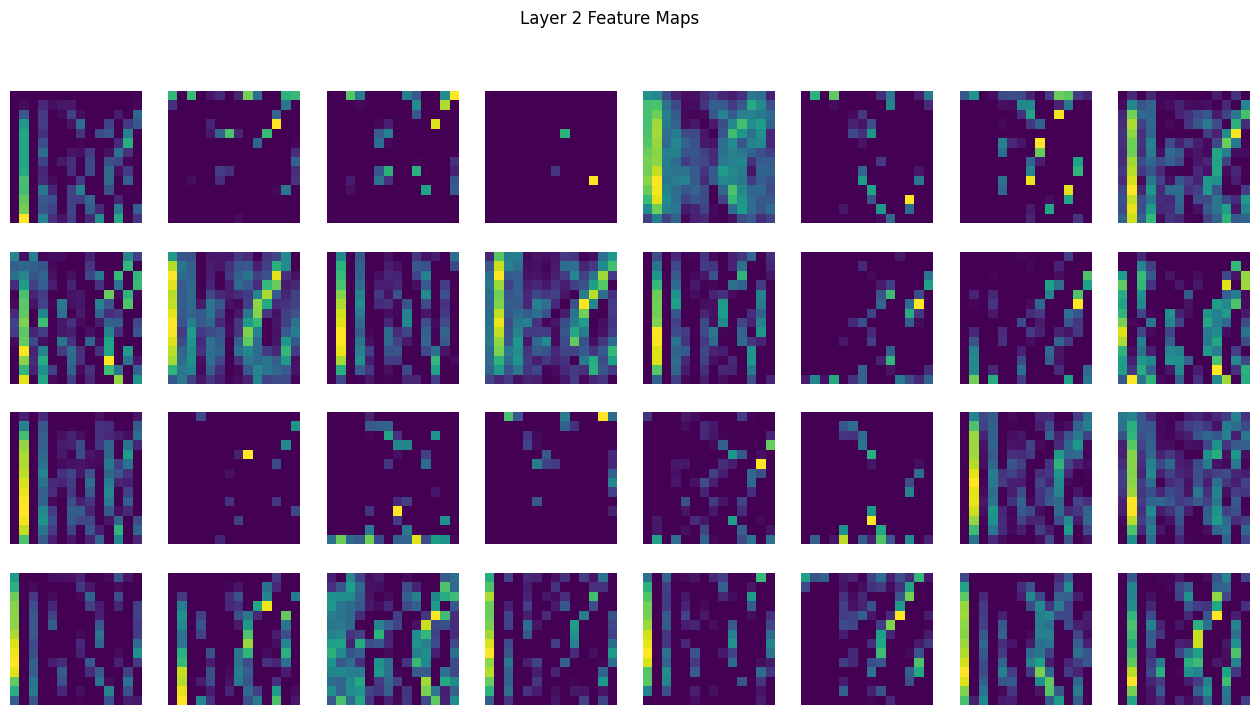

In [18]:
# # Khởi tạo mô hình và tải trọng số đã huấn luyện (nếu có)
# model = SimpleCNN()

# Đọc ảnh từ file
image_path = '/content/drive/MyDrive/5_AIADVANCE/ai.png'  # Thay thế bằng đường dẫn tới ảnh của bạn
image = load_image(image_path)

# Xóa feature maps cũ trước khi forward
model.feature_maps = []

# Forward qua mô hình
output = model(image.unsqueeze(0))

# Hiển thị các feature maps
plot_feature_maps(model.feature_maps)

### Huấn luyện

In [7]:
def custom_mse_loss(output, target):
    loss = torch.mean((output - target) ** 2)
    return loss

In [4]:
class SimpleSGDOptimizer:
    def __init__(self, params, lr=0.01):
        self.params = list(params)
        self.lr = lr

    def step(self):
        for param in self.params:
            if param.grad is not None:
                param.data -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()


In [12]:
class AdamOptimizer:
  def __init__(self, params, lr=0.001, beta1=0.9, beta2=0.999):
    self.params = list(params)
    self.lr = lr
    self.beta1 = beta1
    self.beta2 = beta2

    self.iter = 0
    self.m = [0] * len(self.params)
    self.v = [0] * len(self.params)

  def step(self):
    self.iter += 1

    for i, param in enumerate(self.params):
      if param.grad is not None:
        self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * param.grad
        self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * param.grad ** 2

        m_hat = self.m[i] / (1 - self.beta1 ** self.iter)
        v_hat = self.v[i] / (1 - self.beta2 ** self.iter)

        param.data -= self.lr * m_hat / (v_hat**0.5 + 1e-7)

  def zero_grad(self):
    for param in self.params:
      if param.grad is not None:
        param.grad.zero_()

In [15]:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Chuẩn bị dữ liệu MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Khởi tạo mô hình, hàm loss và optimizer
# model = SimpleCNN()
# optimizer = SimpleSGDOptimizer(model.parameters(), lr=0.01)
optimizer = AdamOptimizer(model.parameters())

# Huấn luyện mô hình
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        model.feature_maps = []
        optimizer.zero_grad()
        output = model(data)

        # Chuyển đổi target thành one-hot vector
        target_one_hot = torch.zeros(output.size()).scatter_(1, target.view(-1, 1), 1)

        loss = custom_mse_loss(output, target_one_hot)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}, Loss: {loss.item()}')


Epoch 1/5, Batch 0, Loss: 0.47569531202316284
Epoch 1/5, Batch 100, Loss: 0.038162145763635635
Epoch 1/5, Batch 200, Loss: 0.02804393135011196
Epoch 1/5, Batch 300, Loss: 0.021930288523435593
Epoch 1/5, Batch 400, Loss: 0.016978051513433456
Epoch 1/5, Batch 500, Loss: 0.01947127841413021
Epoch 1/5, Batch 600, Loss: 0.012220599688589573
Epoch 1/5, Batch 700, Loss: 0.012696544639766216
Epoch 1/5, Batch 800, Loss: 0.011678406968712807
Epoch 1/5, Batch 900, Loss: 0.008681884035468102
Epoch 2/5, Batch 0, Loss: 0.008600233122706413
Epoch 2/5, Batch 100, Loss: 0.008647509850561619
Epoch 2/5, Batch 200, Loss: 0.011351652443408966
Epoch 2/5, Batch 300, Loss: 0.007536699529737234
Epoch 2/5, Batch 400, Loss: 0.0098965372890234
Epoch 2/5, Batch 500, Loss: 0.0100018922239542
Epoch 2/5, Batch 600, Loss: 0.013557298108935356
Epoch 2/5, Batch 700, Loss: 0.005164040718227625
Epoch 2/5, Batch 800, Loss: 0.004633490927517414
Epoch 2/5, Batch 900, Loss: 0.007443908601999283
Epoch 3/5, Batch 0, Loss: 0.007

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate(model, data_loader):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for data, target in data_loader:
            output = model(data)
            preds = output.argmax(dim=1, keepdim=True).squeeze()
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

    precision = precision_score(all_targets, all_preds, average='weighted')
    recall = recall_score(all_targets, all_preds, average='weighted')
    f1 = f1_score(all_targets, all_preds, average='weighted')
    accuracy = accuracy_score(all_targets, all_preds)

    return precision, recall, f1, accuracy

# Đánh giá mô hình sau mỗi epoch
precision, recall, f1, accuracy = evaluate(model, train_loader)
print(f'Epoch {epoch+1}/{num_epochs}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, Accuracy: {accuracy:.4f}')

Epoch 5/5, Precision: 0.9904, Recall: 0.9904, F1: 0.9904, Accuracy: 0.9904


In [10]:
def show_image_with_prediction(model, data_loader, index=0):
    model.eval()
    with torch.no_grad():
        data, target = next(iter(data_loader))
        image = data[index]
        true_label = target[index].item()

        output = model(image.unsqueeze(0))
        pred_label = output.argmax(dim=1, keepdim=True).item()

        image = image.squeeze().numpy()

        plt.imshow(image, cmap='gray')
        plt.title(f'True Label: {true_label}, Predicted Label: {pred_label}')
        if (true_label==pred_label):
            print('model dự đoán đúng')
        else:
            print('model dự đoán sai')
        plt.show()


model dự đoán đúng


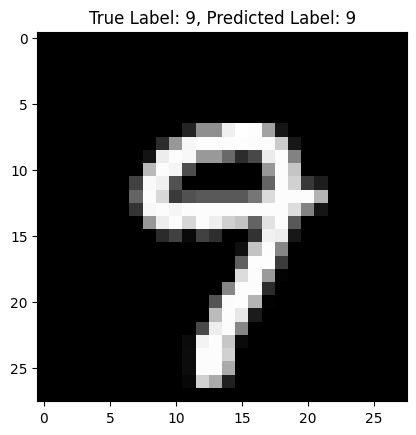

In [11]:
# Hiển thị ảnh và dự đoán
show_image_with_prediction(model, train_loader, index=0)

Hiển thị weight sau khi model hội tụ

In [19]:
# lớp convolution 1
print(model.conv1.weight.shape)
print(model.conv1.weight[0])
# lớp convolution 2
print(model.conv2.weight.shape)
print(model.conv2.weight[0][0])
# lớp fully connected 1
print(model.fc1.weight.shape)
print(model.fc1.weight[0:10])
# lớp fully connected 2
print(model.fc2.weight.shape)
print(model.fc2.weight[0:10])

torch.Size([16, 1, 3, 3])
tensor([[[ 1.1336,  0.5619, -0.6850],
         [ 1.1235,  0.2975, -0.8620],
         [ 0.7256, -0.2588, -0.9948]]], grad_fn=<SelectBackward0>)
torch.Size([32, 16, 3, 3])
tensor([[-0.1124,  0.3661,  0.2255],
        [-0.1470, -0.0208, -0.3462],
        [ 0.0412, -0.0236, -0.0571]], grad_fn=<SelectBackward0>)
torch.Size([128, 1568])
tensor([[ 0.0140, -0.0243,  0.0087,  ..., -0.0205,  0.0033, -0.0037],
        [-0.0191, -0.0137,  0.0095,  ...,  0.0023, -0.0037, -0.0200],
        [-0.0269, -0.0194,  0.0136,  ...,  0.0604,  0.0112,  0.1437],
        ...,
        [ 0.0083,  0.0280, -0.0072,  ..., -0.0088, -0.0276, -0.0193],
        [-0.0039, -0.0232,  0.0021,  ..., -0.0132, -0.0259, -0.0071],
        [-0.0044,  0.0021, -0.0112,  ..., -0.0300, -0.0291, -0.0053]],
       grad_fn=<SliceBackward0>)
torch.Size([10, 128])
tensor([[ 0.0641,  0.0194, -0.0066,  ..., -0.0331,  0.0028,  0.0740],
        [ 0.0081, -0.0760, -0.0044,  ..., -0.0689,  0.0050,  0.0077],
        [ 0.